                                                    Predicting Breast Cancer in a patient


Step #1: Import Libraries and datasets

In [1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler


from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.preprocessing import LabelEncoder
import pickle
from imblearn.combine import SMOTETomek
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [ ]:
#Load data,Convert CSV File to Dataframe

In [2]:
data=pd.read_csv("C:/Users/admin pc/Downloads/cancer.csv")

Step #2: EDA - Explore/Visualize Dataset

In [ ]:
#To get first 5 rows(records) of Data frame

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
#To get number of rows and columns of our dataframe

In [4]:
data.shape

(569, 33)

In [6]:
#In the result displayed, you can see the data has 569 records, each with 32 columns.

In [7]:
# info() method provides a concise summary of the data; from the output, it provides the type of data in each column, the number of non-null values in each column, and how much memory the data frame is using.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
#For statistical summery we can use describe

In [8]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [9]:
#Lt's check null values in the data
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [10]:
#The feature unnamed contains 569 null values ,so we can drop it

In [13]:
data.drop("Unnamed: 32",axis=1,inplace=True)

<Axes: >

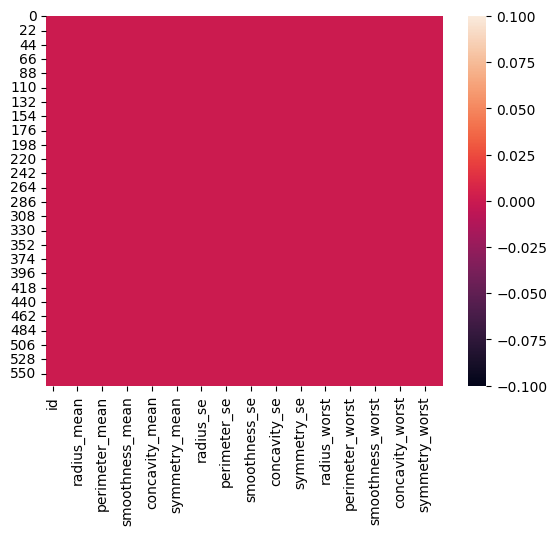

In [12]:
#Checking null value using heatmap
sns.heatmap(data.isnull())

In [5]:
data.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [14]:
#From the results above, diagnosis is a categorical variable, because it represents a fix number of possible values (i.e, Malignant, of Benign. The machine learning algorithms wants numbers, and not strings, as their inputs so we need some method of coding to convert them.
#Here i am using Label encoder to convert categorical variable(diagnosis) to numerical

In [216]:


encoder=LabelEncoder()
data.diagnosis=encoder.fit_transform(data.diagnosis)

data.diagnosis.value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [ ]:
#onverted B as 0 and M as 1

<Axes: xlabel='diagnosis', ylabel='count'>

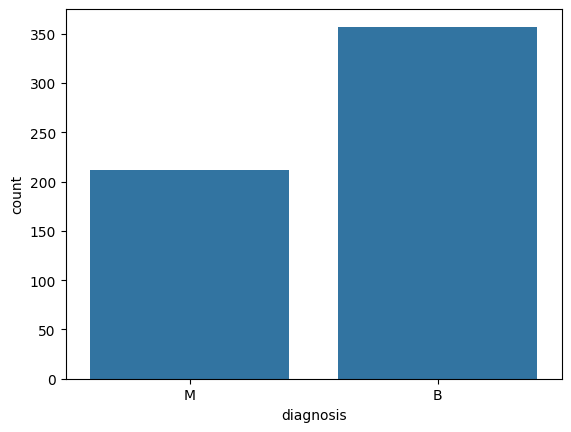

In [8]:
#we can visualise the counts of M and B (1 and 0) using countplot
sns.countplot(data,x='diagnosis')


<Axes: >

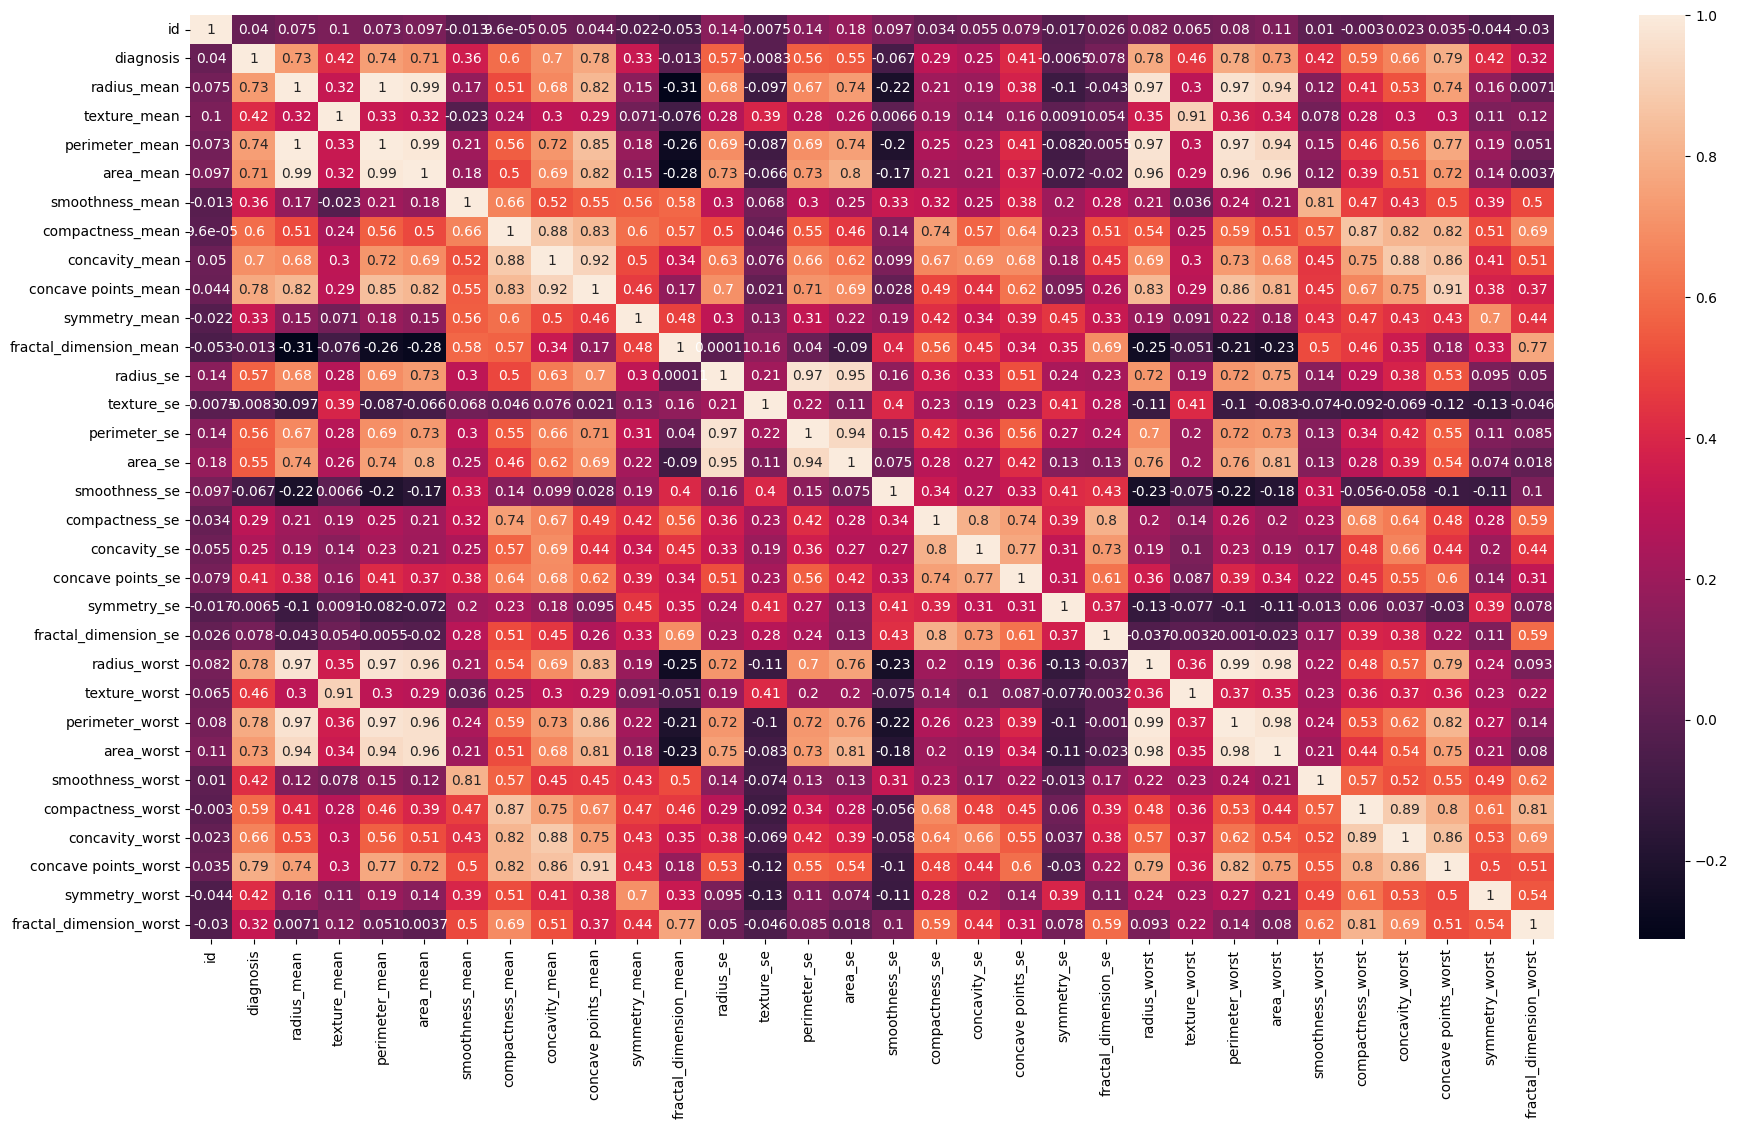

In [18]:
#It is good to check the correlations between the attributes. From the output graph below, The red around the diagonal suggests that attributes are correlated with each other. The yellow and green patches suggest some moderate correlation and the blue boxes show negative correlations.

plt.figure(figsize=(22,12))
sns.heatmap(data.corr(),annot=True)



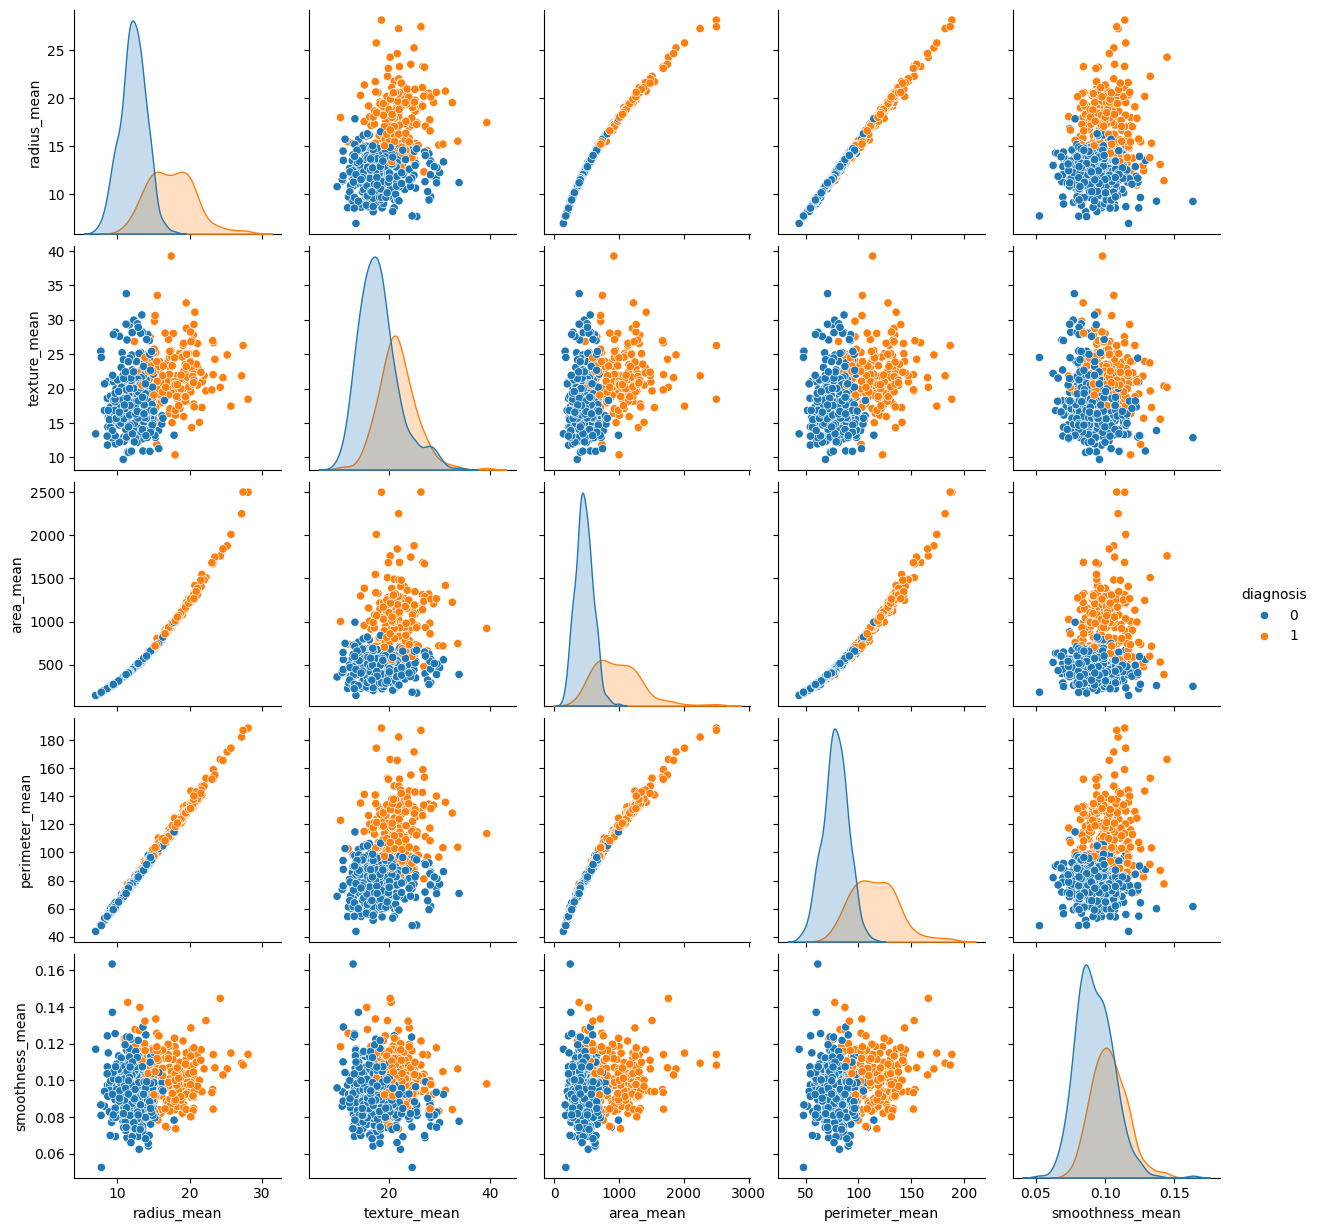

In [20]:
sns.pairplot(data, hue = 'diagnosis', vars = ['radius_mean','texture_mean', 'area_mean', 'perimeter_mean', 'smoothness_mean'])

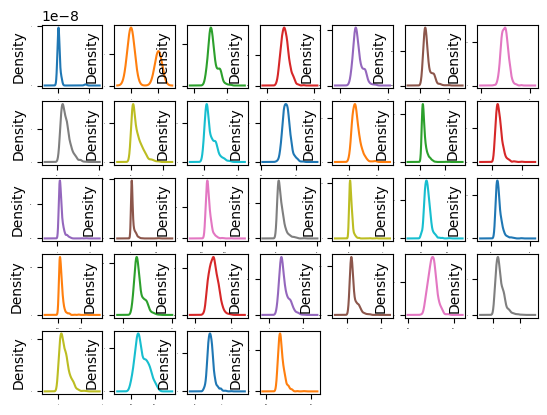

In [29]:
#To know the distribution of data in each features
           
data.plot(kind='density',subplots=True, layout=(5,7), sharex=False, legend=False, fontsize=1)
plt.show()



In [32]:
#In most of the features data distribution is skewed ,so i apply log transformation method to reduce skewness

#Before that we have to select the 

In [14]:
select_k=SelectKBest(score_func=f_classif,k=15)

x=data.drop("diagnosis",axis=1)
y=data.diagnosis

x_new=select_k.fit_transform(x,y)

indices_seltd=select_k.get_support(indices=True)
features=data.columns[indices_seltd]
features

Index(['diagnosis', 'texture_mean', 'perimeter_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'fractal_dimension_mean',
       'texture_se', 'perimeter_se', 'fractal_dimension_se', 'texture_worst',
       'perimeter_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst'],
      dtype='object')

In [ ]:
#Above features are selected by 

In [103]:
data_new=pd.DataFrame(data,columns=['diagnosis', 'texture_mean', 'perimeter_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'fractal_dimension_mean',
       'texture_se', 'perimeter_se', 'fractal_dimension_se', 'texture_worst',
       'perimeter_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst'])

In [104]:
data_new.shape

(569, 15)

In [209]:
data.iloc[100]

diagnosis                    1.000000
radius_mean                 13.610000
texture_mean                21.800000
perimeter_mean              88.050000
area_mean                  582.700000
smoothness_mean              0.094880
compactness_mean             0.085110
concavity_mean               0.086250
concave points_mean          0.044890
symmetry_mean                0.161900
fractal_dimension_mean       0.058710
radius_se                    0.456500
texture_se                   1.290000
perimeter_se                 2.861000
area_se                     43.140000
smoothness_se                0.005872
compactness_se               0.014880
concavity_se                 0.026470
concave points_se            0.009921
symmetry_se                  0.015160
fractal_dimension_se         0.002355
radius_worst                16.990000
texture_worst               29.720000
perimeter_worst            108.600000
area_worst                 906.500000
smoothness_worst             0.126500
compactness_

In [42]:
columns_=data_new.columns

skew : 0.5270671676029054


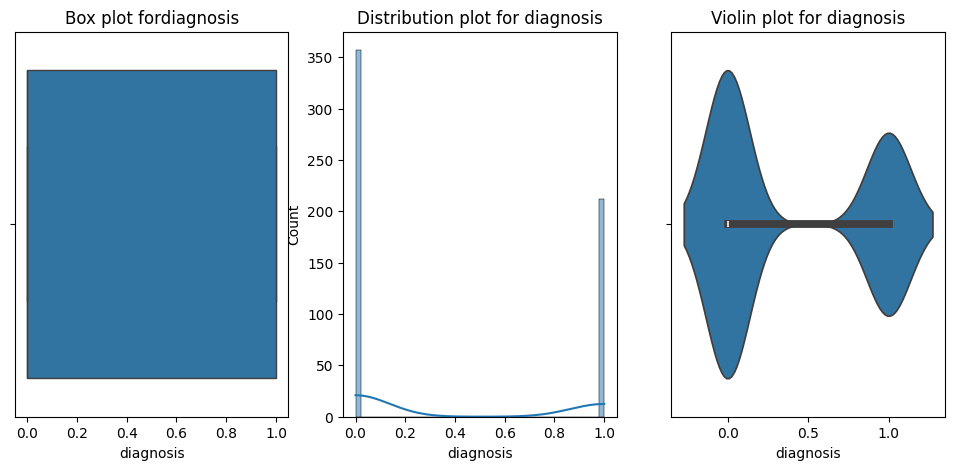

skew : 0.6487335672867015


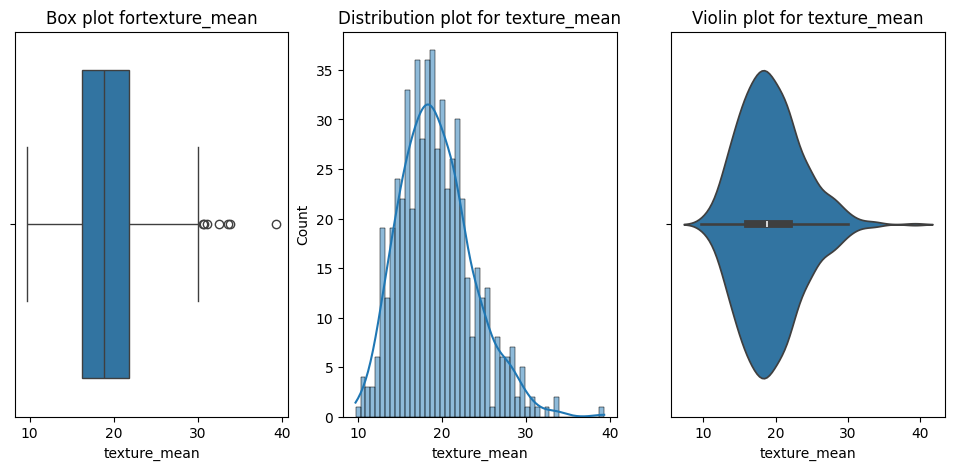

skew : 0.9880369541677213


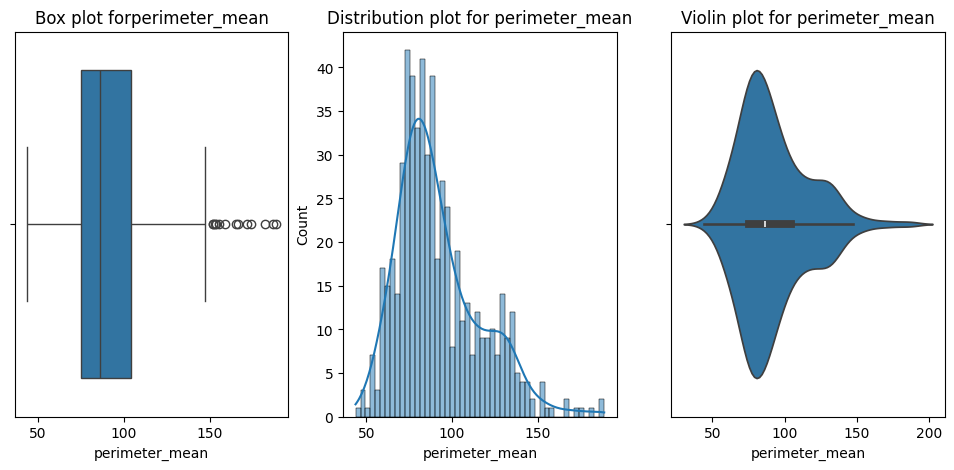

skew : 0.4551199203571718


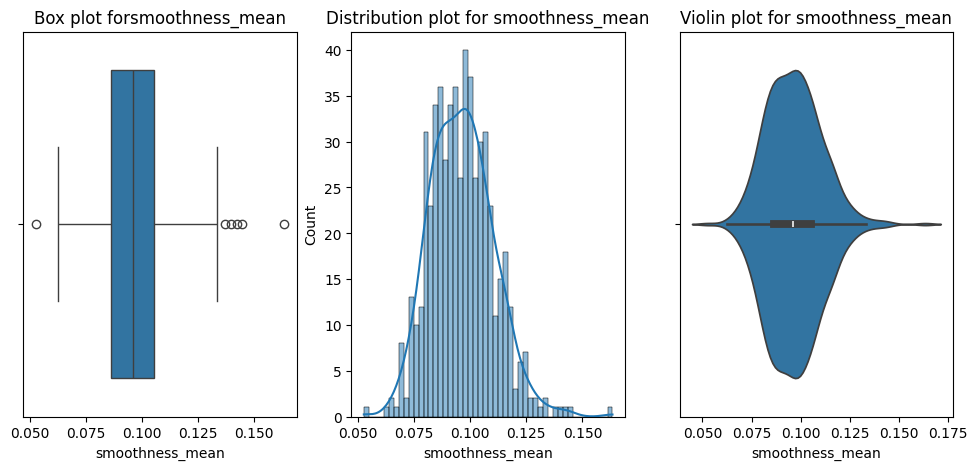

skew : 1.186983323974523


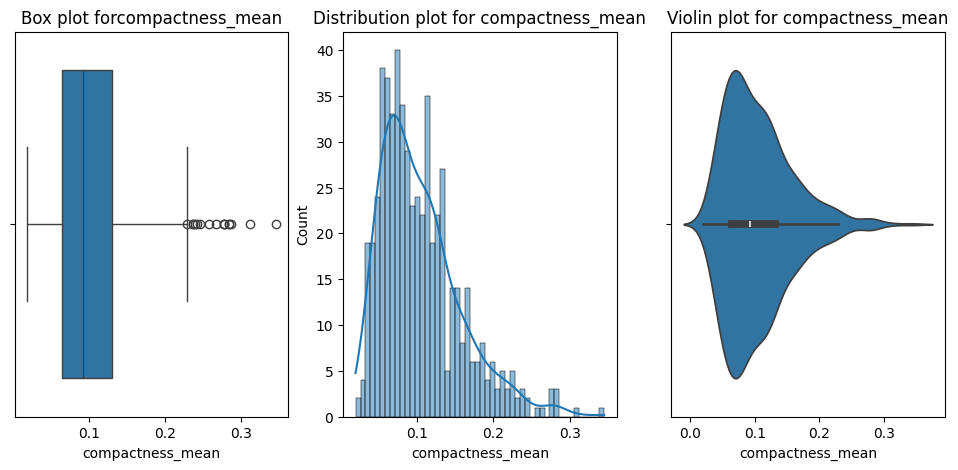

skew : 1.3974832352826647


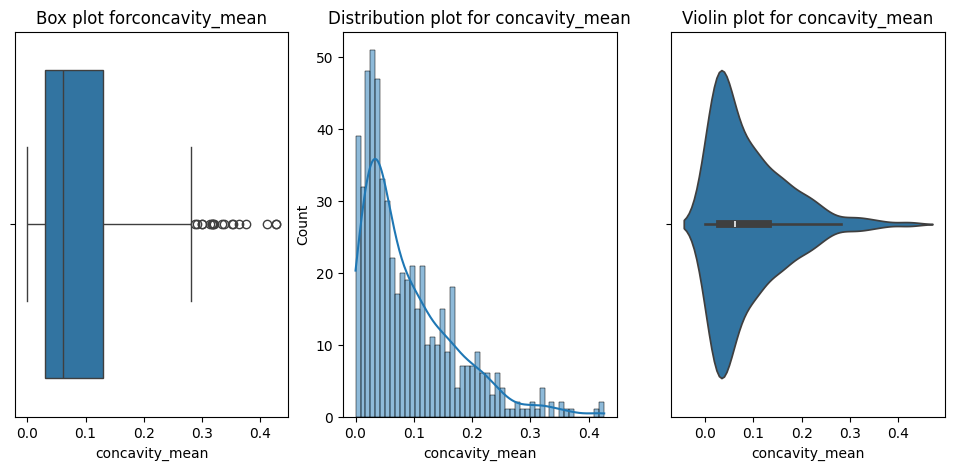

skew : 1.3010473927890858


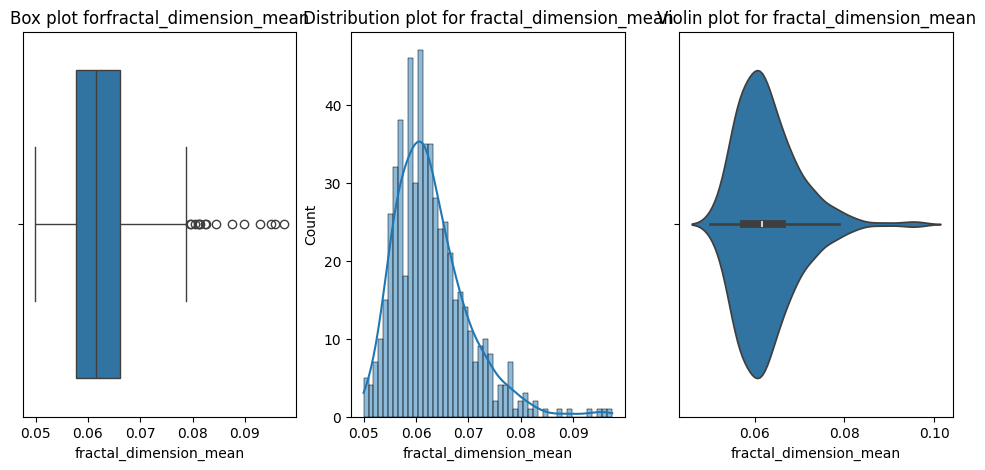

skew : 1.6421002649479612


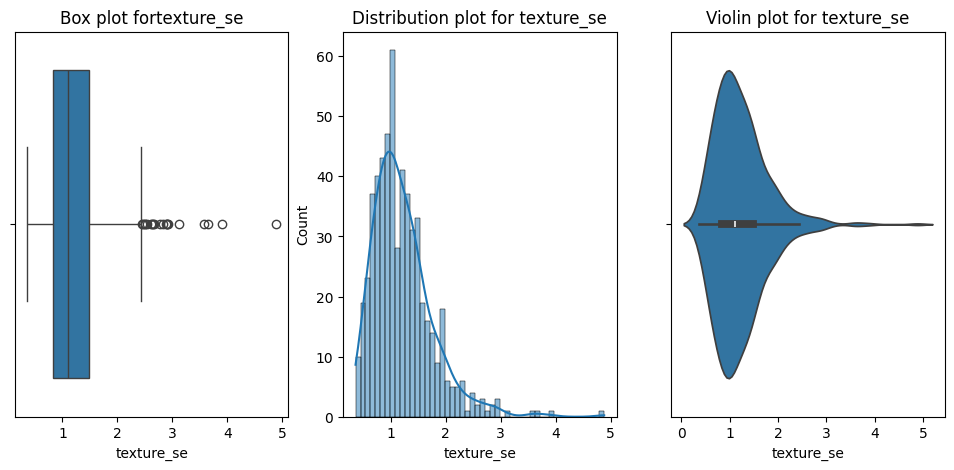

skew : 3.4345304746147067


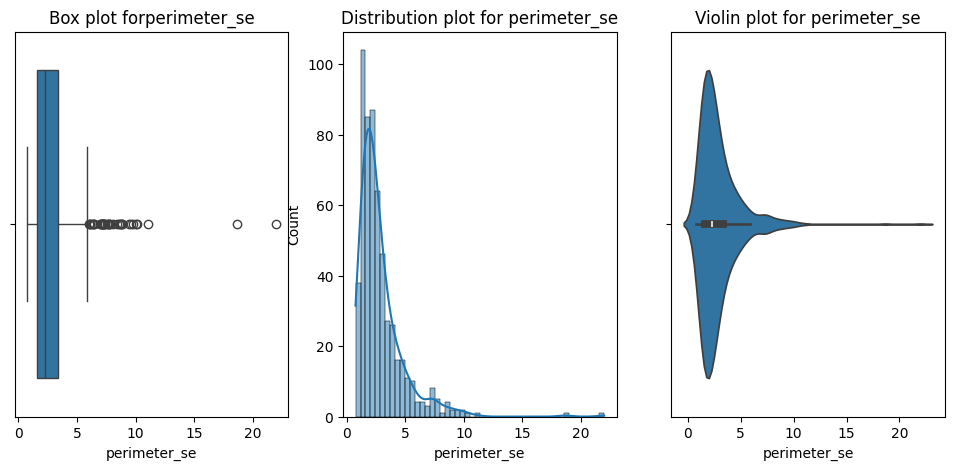

skew : 3.913616654675261


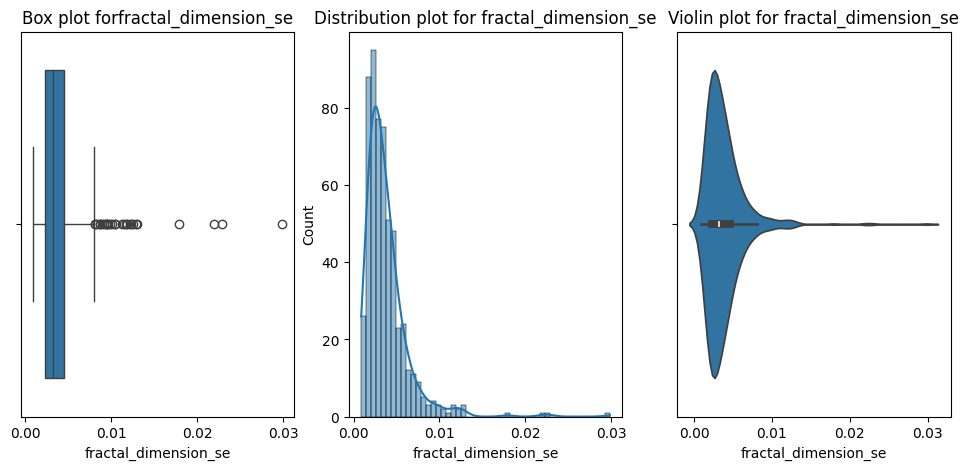

skew : 0.4970066697616781


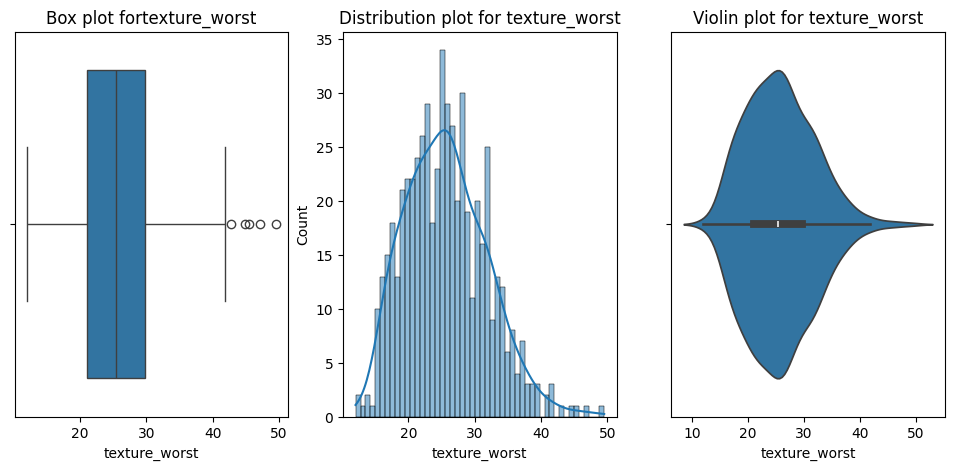

skew : 1.1251876208771259


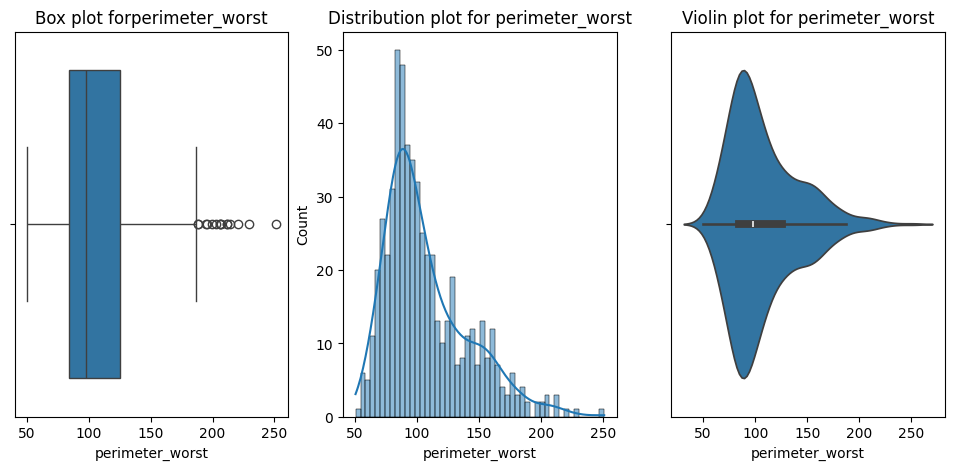

skew : 0.41433004572343024


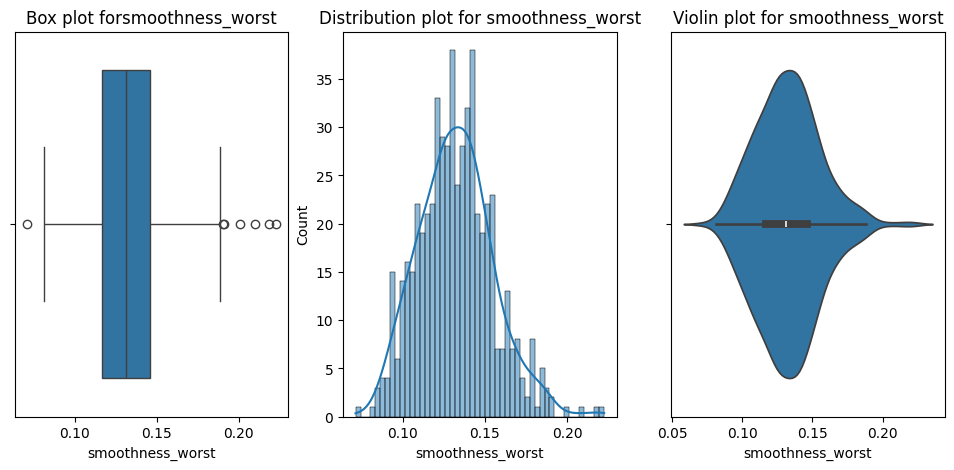

skew : 1.4696674610957545


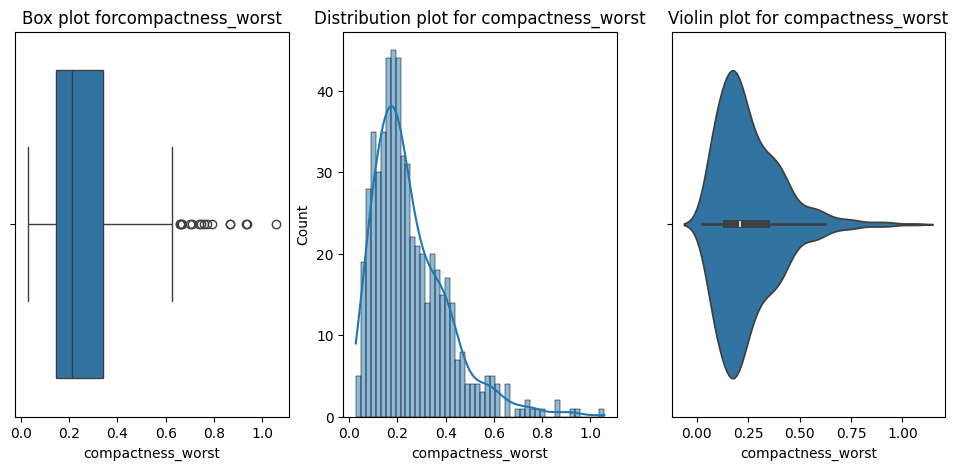

skew : 1.147202339994203


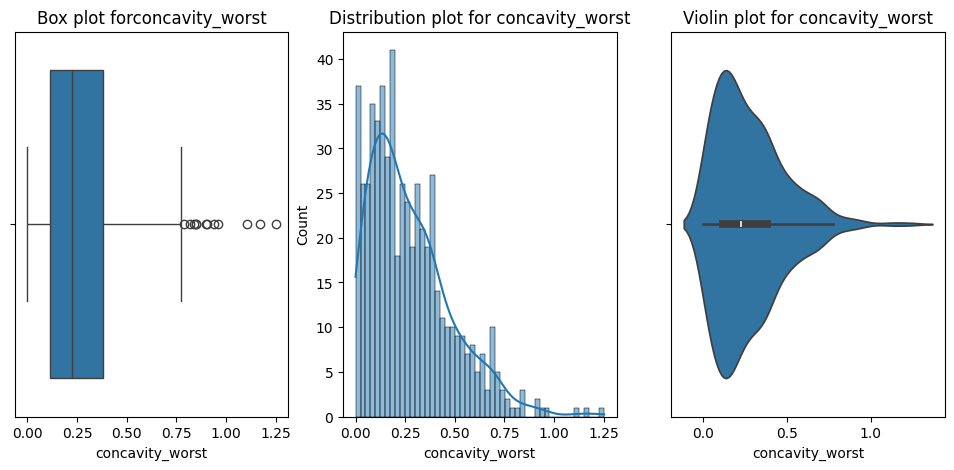

In [43]:
def plot(df,column):
    plt.figure(figsize=(12,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df,x=column)
    plt.title(f'Box plot for{column}')
    print("skew :", skew(df[column]))


    plt.subplot(1,3,2)
    sns.histplot(data=df,x=column,bins=50,kde=True)
    
    plt.title(f'Distribution plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df,x=column)
    plt.title(f'Violin plot for {column}')
    plt.show()


columns_=data_new.columns
for item_ in columns_:
           plot(data_new,item_)



In [105]:
data_new['perimeter_mean_log']=np.log(data_new['perimeter_mean'])
data_new['smoothness_mean_log']=np.log(data_new['smoothness_mean'])
data_new['compactness_mean_log']=np.log(data_new['compactness_mean'])
data_new['concavity_mean_log']=np.log(data_new['concavity_mean'])
data_new['fractal_dimension_mean_log']=np.log(data_new['fractal_dimension_mean'])
data_new['texture_se_log']=np.log(data_new['texture_se'])
data_new['perimeter_se_log']=np.log(data_new['perimeter_se'])
data_new['fractal_dimension_se_log']=np.log(data_new['fractal_dimension_se'])
data_new['texture_worst_log']=np.log(data_new['texture_worst'])
data_new['perimeter_worst_log']=np.log(data_new['perimeter_worst'])
data_new['smoothness_worst_log']=np.log(data_new['smoothness_worst'])
data_new['compactness_worst_log']=np.log(data_new['compactness_worst'])




In [106]:
data_new.drop(['perimeter_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'fractal_dimension_mean',
       'texture_se', 'perimeter_se', 'fractal_dimension_se', 'texture_worst',
       'perimeter_worst', 'smoothness_worst', 'compactness_worst'],axis=1,inplace=True)

In [197]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,15.78,16.17,104.10,782.7,0.10530,0.13040,0.1307,0.07400,0.1957,...,18.79,21.08,125.40,1084.0,0.1460,0.3391,0.3829,0.1614,0.3179,0.09208
1,1,15.78,17.77,104.10,782.7,0.08637,0.07864,0.0869,0.07017,0.1812,...,18.79,23.41,125.40,1084.0,0.1238,0.1866,0.2416,0.1614,0.2750,0.08902
2,1,15.78,21.25,104.10,782.7,0.10530,0.13040,0.1307,0.07400,0.1957,...,18.79,25.53,125.40,1084.0,0.1444,0.3391,0.3829,0.1614,0.3179,0.08758
3,1,11.70,20.38,77.58,420.3,0.10530,0.13040,0.1307,0.07400,0.1957,...,14.91,26.50,98.87,567.7,0.1460,0.3391,0.3829,0.1614,0.3179,0.09208
4,1,15.78,16.17,104.10,782.7,0.10030,0.13040,0.1307,0.07400,0.1809,...,18.79,21.08,125.40,1084.0,0.1374,0.2050,0.3829,0.1614,0.2504,0.07678


In [107]:
column__=data_new.columns
column__


Index(['diagnosis', 'texture_mean', 'concavity_worst', 'perimeter_mean_log',
       'smoothness_mean_log', 'compactness_mean_log', 'concavity_mean_log',
       'fractal_dimension_mean_log', 'texture_se_log', 'perimeter_se_log',
       'fractal_dimension_se_log', 'texture_worst_log', 'perimeter_worst_log',
       'smoothness_worst_log', 'compactness_worst_log'],
      dtype='object')

In [196]:
data["compactness_worst"].min()

0.1472

In [108]:
#Out lier Handling
column__=data_new.columns
def outlier(df,column):
    Q1=df[column].quantile(.25)
    Q3=df[column].quantile(.75)
    IQR=Q1-Q1
    upper_limit=Q3+(1.5*IQR)
    lower_limit=Q1-(1.5*IQR)
    df[column]=df[column].clip(upper_limit,lower_limit)
    return df

for item in column__:
         cleaned_data=outlier(data_new,item)


skew : 0.5270671676029054


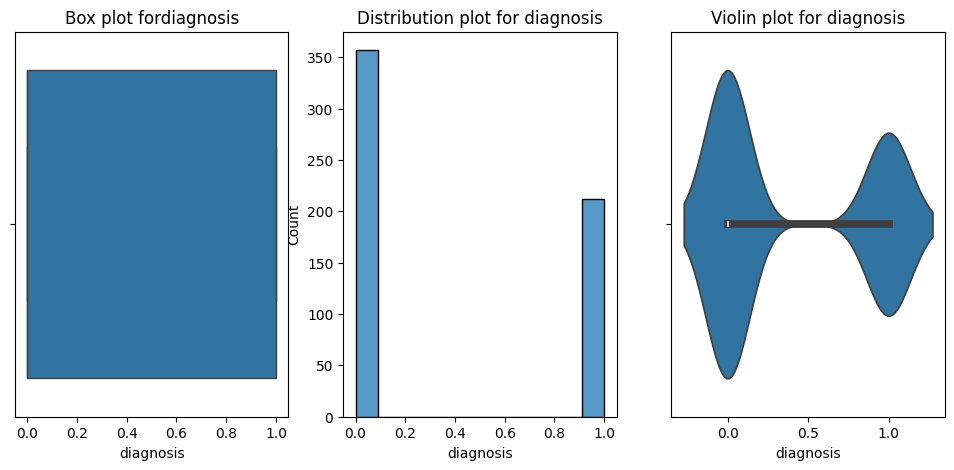

skew : 0.03255102359406754


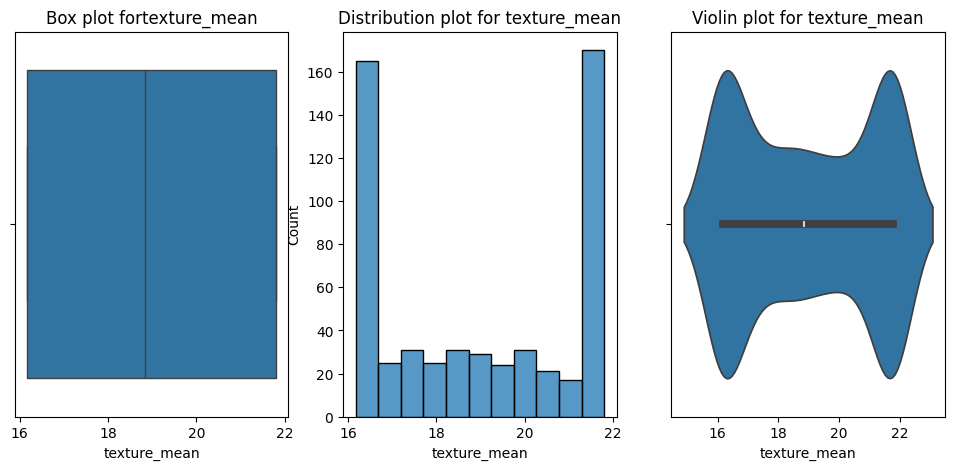

skew : 0.13704504727614447


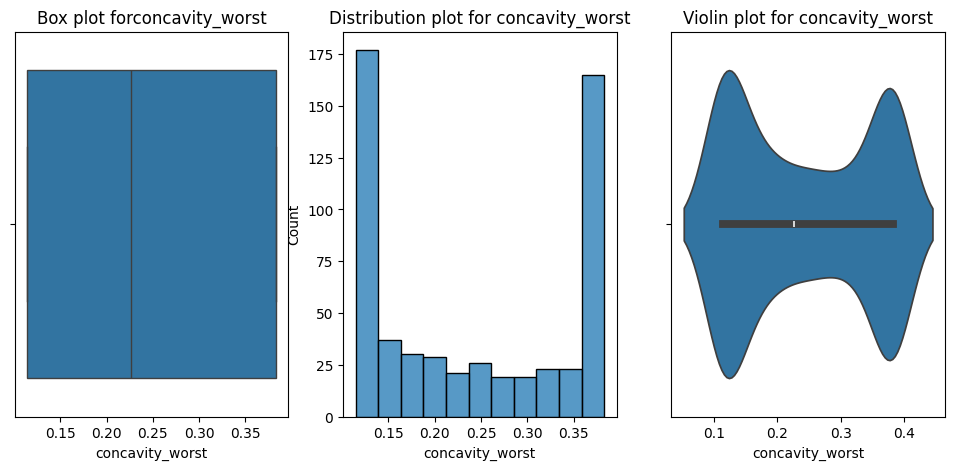

skew : 0.15033566005735574


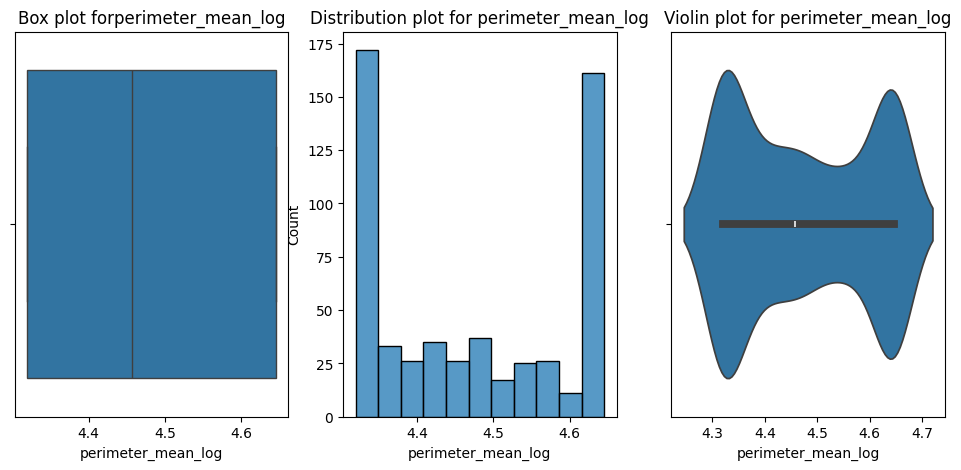

skew : -0.03308954365374994


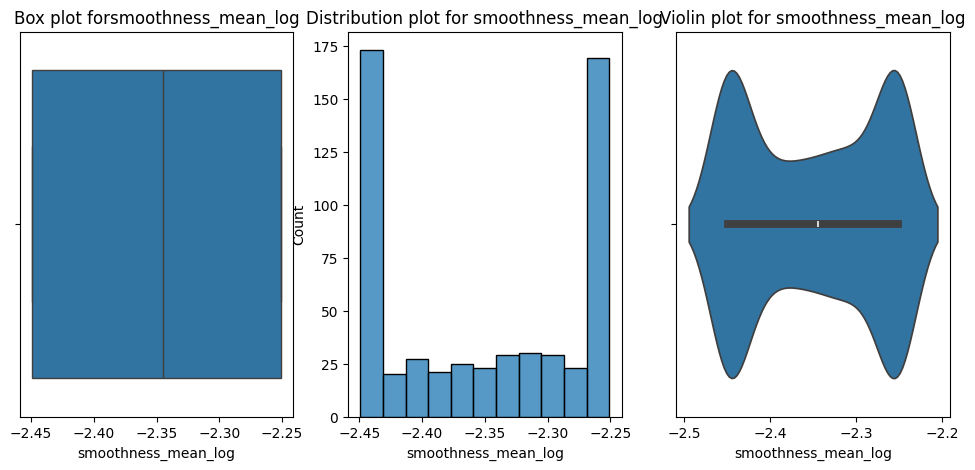

skew : -0.027847022241741917


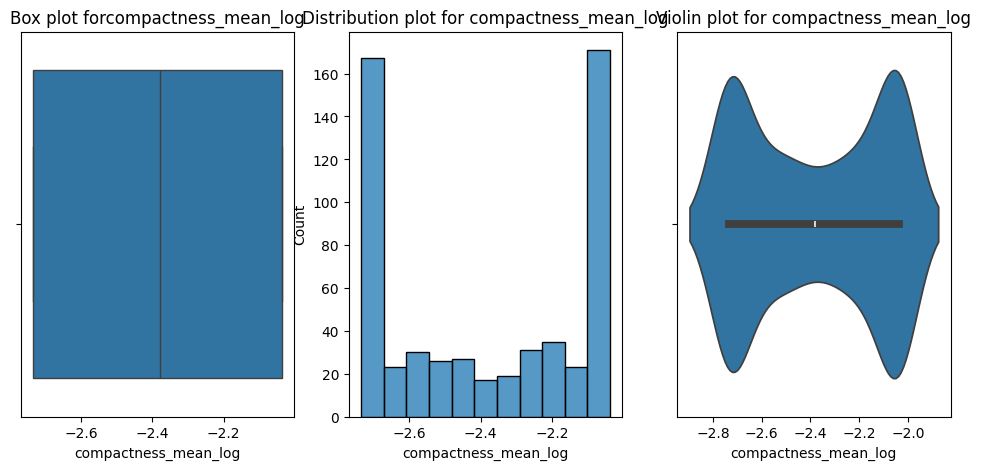

skew : -0.000864218451217242


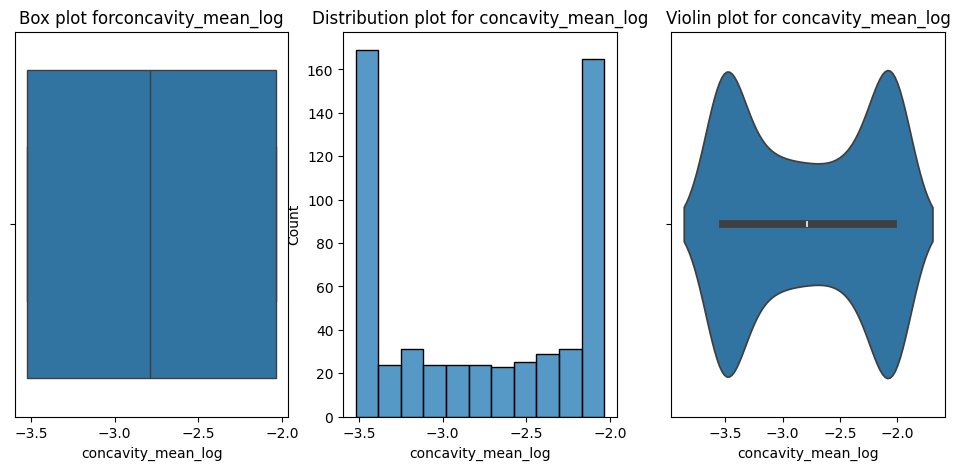

skew : 0.03363011198818341


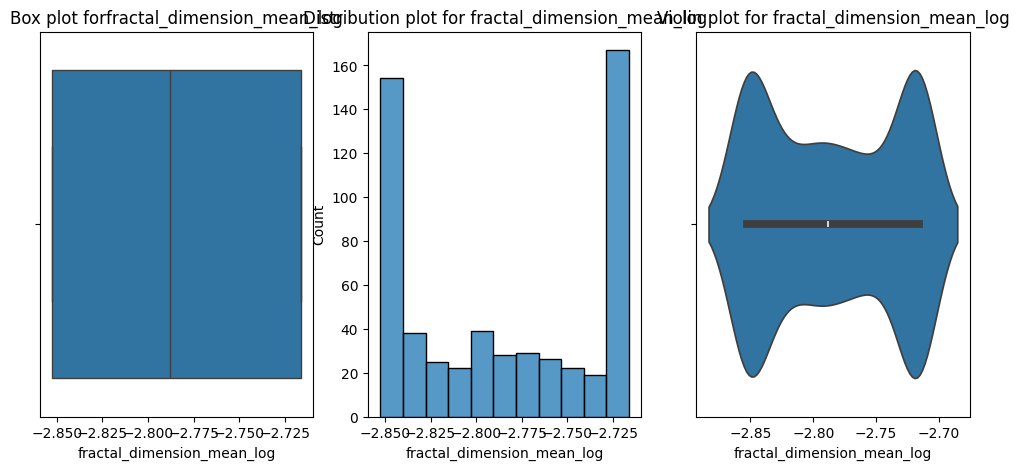

skew : -0.020789672095827865


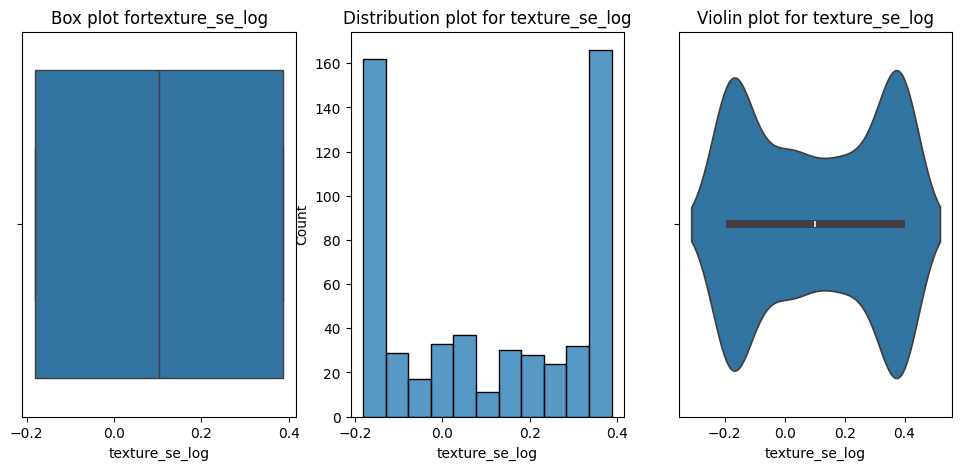

skew : 0.03492216687323791


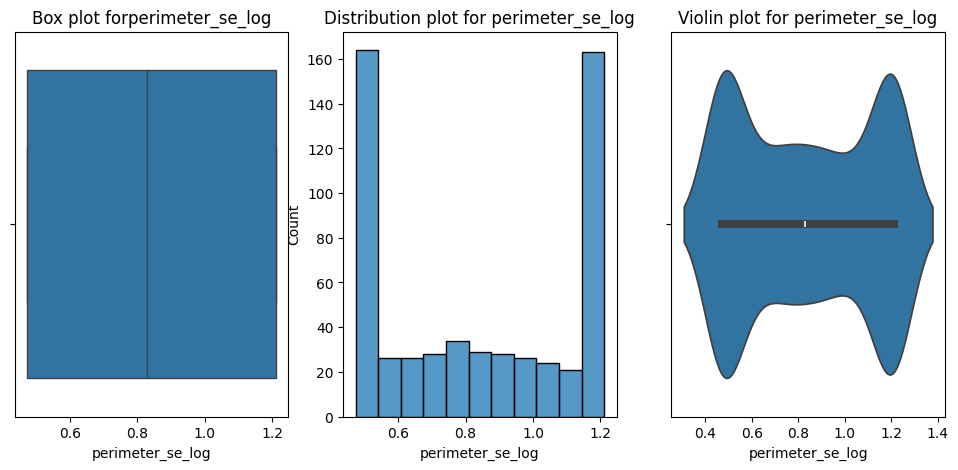

skew : 0.03694517183211697


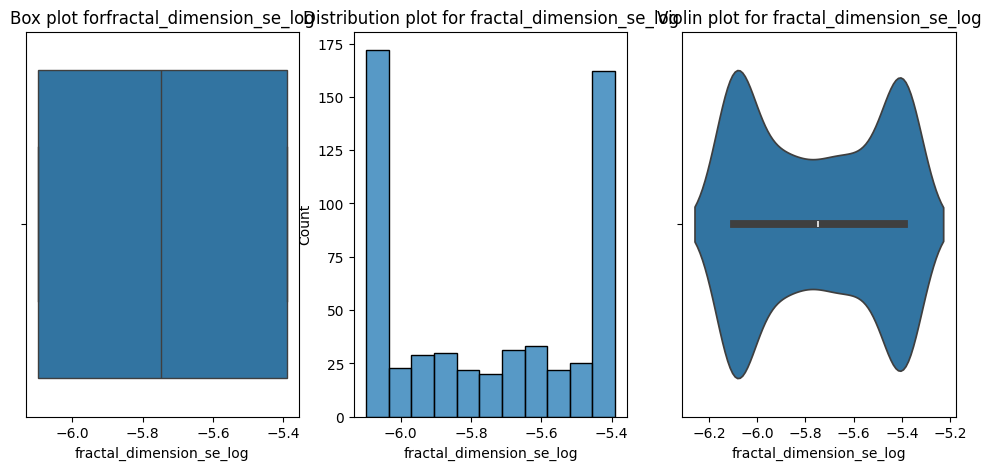

skew : -0.04925333477068696


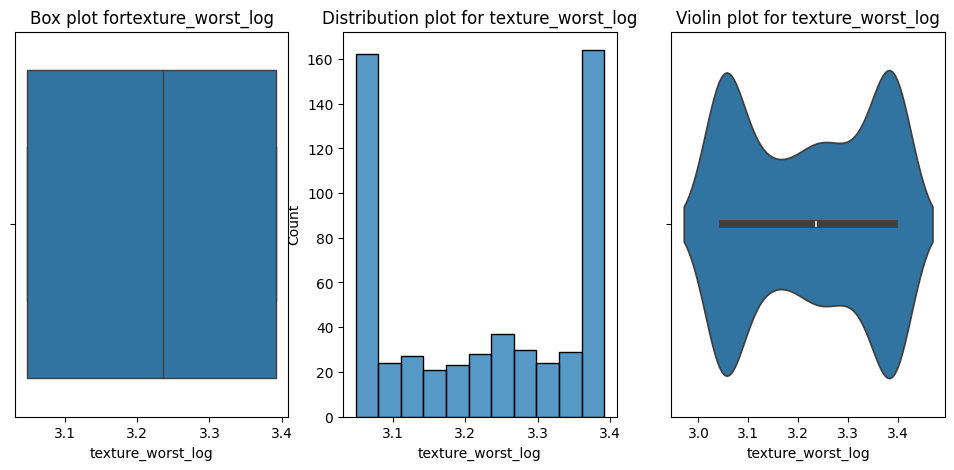

skew : 0.24026366346049685


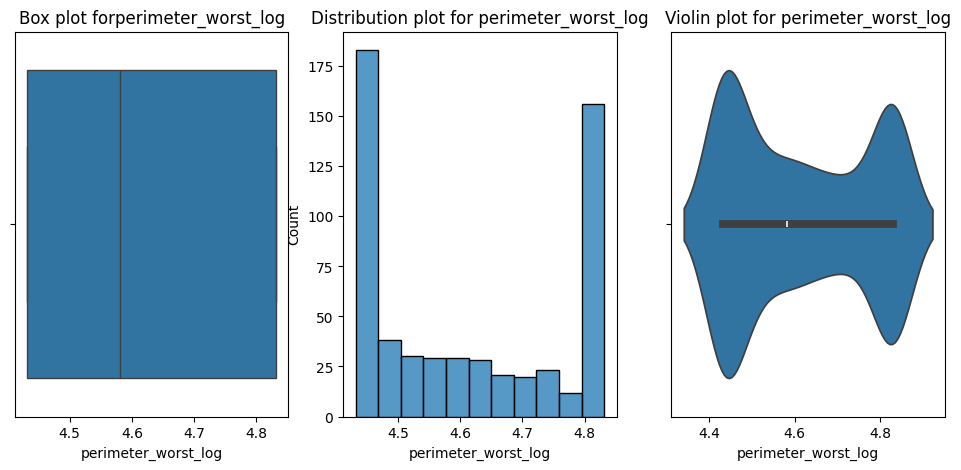

skew : -0.08412720682439437


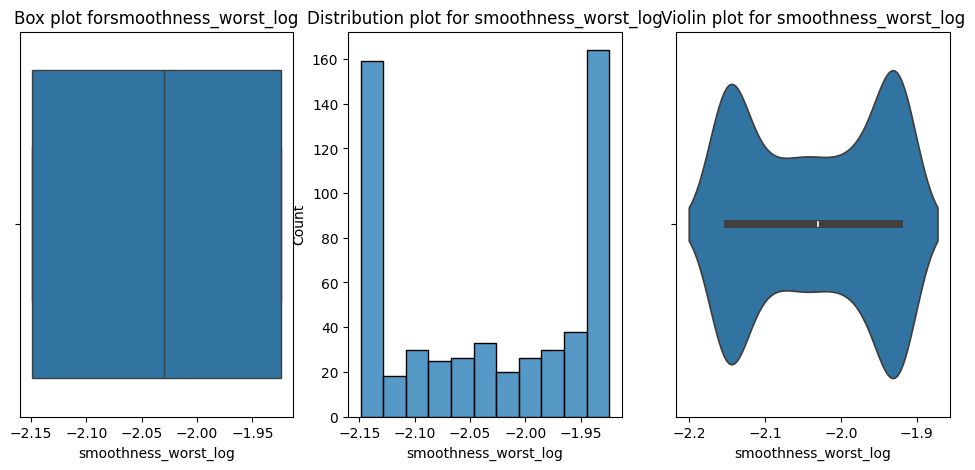

skew : 0.09498745732617707


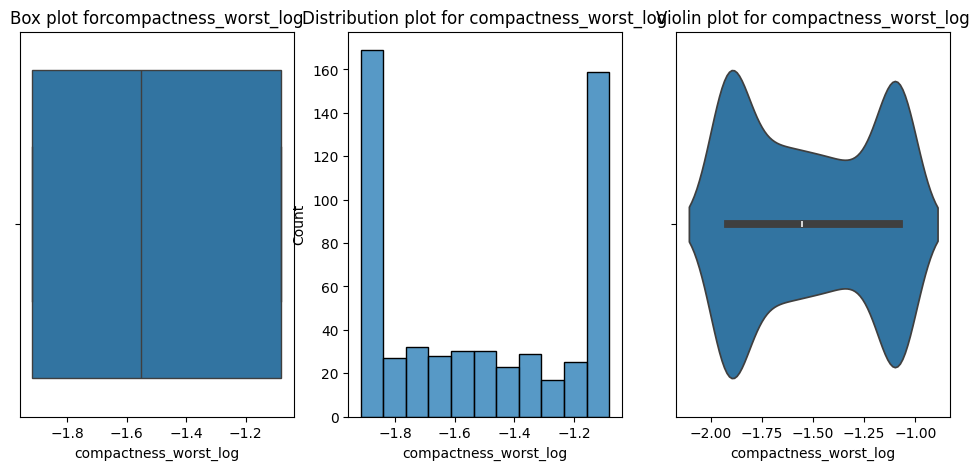

In [109]:
def plot_new(df1,column1):
    plt.figure(figsize=(12,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df1,x=column1)
    plt.title(f'Box plot for{column1}')
    print("skew :", skew(df1[column1]))


    plt.subplot(1,3,2)
    sns.histplot(data=df1,x=column1)
    plt.title(f'Distribution plot for {column1}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df1,x=column1)
    plt.title(f'Violin plot for {column1}')
    plt.show()


columns_=data_new.columns
for item_1 in columns_:
           plot_new(cleaned_data,item_1)



In [202]:
data_new.head()


,diagnosis,texture_mean,concavity_worst,perimeter_mean_log,smoothness_mean_log,compactness_mean_log,concavity_mean_log,fractal_dimension_mean_log,texture_se_log,perimeter_se_log,fractal_dimension_se_log,texture_worst_log,perimeter_worst_log,smoothness_worst_log,compactness_worst_log
0,1,16.17,0.3829,4.645352,-2.250942,-2.037149,-2.034851,-2.716284,-0.099489,1.211048,-5.390871,3.048325,4.831509,-1.924149,-1.081460
1,1,17.77,0.2416,4.645352,-2.449115,-2.542875,-2.442997,-2.852498,-0.181642,1.211048,-5.645891,3.153163,4.831509,-2.089088,-1.678788
2,1,21.25,0.3829,4.645352,-2.250942,-2.037149,-2.034851,-2.813577,-0.181642,1.211048,-5.390871,3.239854,4.831509,-1.935168,-1.081460
3,1,20.38,0.3829,4.351310,-2.250942,-2.037149,-2.034851,-2.716284,0.144966,1.211048,-5.390871,3.277145,4.593806,-1.924149,-1.081460
4,1,16.17,0.3829,4.645352,-2.299590,-2.037149,-2.034851,-2.833103,-0.181642,1.211048,-5.390871,3.048325,4.831509,-1.984859,-1.584745


In [50]:
#Model crea
from sklearn import svm
from sklearn.model_selection import train_test_split

In [110]:
cleaned_data.diagnosis.value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [77]:
from imblearn.combine import SMOTETomek

In [111]:
data_new.diagnosis

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

In [112]:
X=cleaned_data.drop("diagnosis",axis=1)
Y=cleaned_data.diagnosis


In [127]:
X_new,Y_new= SMOTETomek().fit_resample(X,Y)


In [128]:
Y_new.value_counts()


diagnosis
1    352
0    352
Name: count, dtype: int64

In [129]:
scale=StandardScaler()
X_scale=scale.fit_transform(X_new)

x_train,x_test,y_train,y_test=train_test_split(X_scale,Y_new,test_size=.3)

In [58]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [130]:
#Let's train the data using  ExtraTreesClassifier  algorithm
classification_model=SVC()
classification_model.fit(x_train,y_train)
Y_predict=classification_model.predict(x_test)
print(accuracy_score(y_test,Y_predict))


0.9669811320754716


In [200]:
x_test[85]

array([ 1.12776584,  0.41233765, -0.11429871, -0.32937702, -0.57328211,
        0.3173362 , -0.99417043,  0.73042456,  0.5542099 , -1.06212506,
        1.12094431,  0.18788293, -0.49691548, -0.62078039])

In [201]:
y_test.iloc[85]

1

In [125]:
Y_predict

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0])

In [63]:
import pickle

In [131]:
with open("classification_model.pk1","wb") as f:
          pickle.dump(classification_model,f)

with open("classification_scale.pk1","wb") as f1:
        pickle.dump(scale,f1)

In [132]:
with open("classification_model.pk1","rb") as f_:
          Classi_model=pickle.load(f_)

with open("classification_scale.pk1","rb") as f_1:
        classi_scale=pickle.load(f_1)

In [133]:
from sklearn.metrics import confusion_matrix

In [150]:
# Checking the accuracy of classifier using confusion matrix.
cm=confusion_matrix(y_test, Y_predict)
print(cm)



[[104   3]
 [  4 101]]


<Axes: >

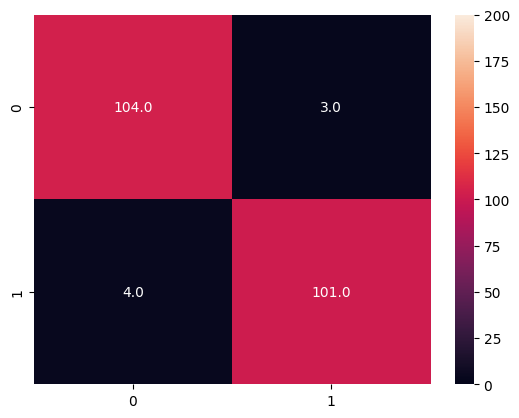

In [160]:
sns.heatmap(cm,annot=True,vmin=0, vmax=200,fmt=".1f")

In [213]:
data.iloc[122]

diagnosis                     1.000000
radius_mean                  15.780000
texture_mean                 20.200000
perimeter_mean              104.100000
area_mean                   782.700000
smoothness_mean               0.105300
compactness_mean              0.130400
concavity_mean                0.130700
concave points_mean           0.074000
symmetry_mean                 0.195700
fractal_dimension_mean        0.066120
radius_se                     0.478900
texture_se                    1.474000
perimeter_se                  3.357000
area_se                      45.190000
smoothness_se                 0.008146
compactness_se                0.032450
concavity_se                  0.042050
concave points_se             0.014710
symmetry_se                   0.023480
fractal_dimension_se          0.004558
radius_worst                 18.790000
texture_worst                23.990000
perimeter_worst             125.400000
area_worst                 1084.000000
smoothness_worst         

In [215]:

test=np.array([[ 20.200000,  0.382900,  np.log(104.100000),  np.log(00.105300),  np.log(0.130400),
        np.log(0.130700),np.log(0.066120),  np.log(1.474000),  np.log(3.357000),
        np.log(0.004558),  np.log(23.990000),  np.log(125.400000),  np.log(0.146000),np.log(0.339100) ]])    
test1=classi_scale.transform(test)
Ypre=classification_model.predict(test)
if Ypre==1:
    print("Malignant")
else:
    print("Benign")    




Benign


In [68]:


#We can see that we achieve an accuracy of 99.1% on the held-out test dataset. From the confusion matrix, there is only 2 case of mis-classification. The performance of this algorithm is expected to be high given the symptoms for breast cancer should exchibit certain clear patterns.


In [144]:

test=np.array([[ 1.09267203,  1.05393352,  0.29818994,  0.22935507,  0.41593485,
        1.00367819, -0.18269677, -0.37546902,  0.29471937,  0.75056631,
        1.12094431,  0.63835149,  0.95496976,  1.0905188 ]])    
test1=classi_scale.transform(test)
Ypre=classification_model.predict(test)
if Ypre==1:
    print("Malignant")
else:
    print("Benign")    




Malignant


In [147]:

test=np.array([[ 1.12776584, -1.35935102, -1.36722914,  0.01451733, -1.04939215,
       -1.43328617,  0.41832989,  1.25570665, -1.42505346, -0.76303588,
        1.12094431, -1.32298259,  1.0627684 , -1.37488763]])    
test1=classi_scale.transform(test)
Ypre=classification_model.predict(test)
if Ypre==1:
    print("Malignant")
else:
    print("Benign")    




Benign


In [ ]:

Conclusion

Machine learning techniques(SVM) was able to classify tumors effectively into malignant and benign tumors with 99 percent accuracy. The technique can rapidly evaluate breast masses and classify them in an automated fashion.

Early breast cancer detection can dramatically save lives especially in the developing world. This technique can further improved by combining computer vision and machine learning and deep learning techniques to classify cancer directly using tissue images.
